In [ ]:
#This source code is based on the regression program made in tutorial on Feb 3 2022 in BMEN 415
#Submitted by: Juan Cepeda
#BMEN 415 - Sensor Systems and Data Analytics
#Classification Models:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




In [ ]:
df = pd.read_csv('/content/breast cancer.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.copy()
print(X)
X = X.drop(['diagnosis', 'id'], axis=1)
y = df["diagnosis"]
y = y.replace(to_replace="M", value=0)
y = y.replace(to_replace="B", value=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)
print(X_train.shape)
print(X_test.shape)


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
X_train.shape

(426, 30)

In [ ]:
# Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

KN_model = KNeighborsClassifier()
KN_model.fit(X_test, y_test)
KN_model.score(X_test, y_test)

KNy_pred_test = KN_model.predict(X_test)
KNy_train_pred = KN_model.predict(X_train)


In [ ]:
KN_accuracy_train = accuracy_score(y_train,KNy_train_pred)
KN_accuracy_test = accuracy_score(y_test,KNy_pred_test)

print(KN_accuracy_train,KN_accuracy_test)

0.931924882629108 0.9230769230769231


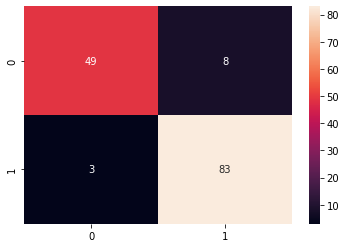

In [ ]:
KN_mat = confusion_matrix(y_test, KNy_pred_test)

sns.heatmap(KN_mat, annot=True)

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_test, y_test)
RF_model.score(X_test, y_test)

RFy_pred_test = RF_model.predict(X_test)
RFy_train_pred = RF_model.predict(X_train)


In [ ]:
RF_accuracy_train = accuracy_score(y_train, RFy_train_pred)
RF_accuracy_test = accuracy_score(y_test,RFy_pred_test)

print(RF_accuracy_train,RF_accuracy_test)

0.9647887323943662 1.0


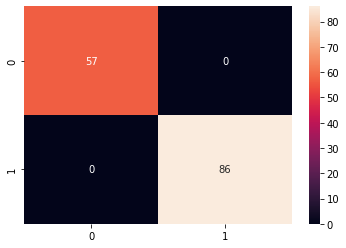

In [ ]:
mat_RF = confusion_matrix(y_test, RFy_pred_test)

sns.heatmap(mat_RF, annot=True)

In [ ]:
# Passive Agressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier
PA_model = PassiveAggressiveClassifier()
PA_model.fit(X_test, y_test)
PA_model.score(X_test, y_test)

PAy_pred_test = PA_model.predict(X_test)
PAy_train_pred = PA_model.predict(X_train)


In [ ]:
PA_accuracy_train = accuracy_score(y_train, PAy_train_pred)
PA_accuracy_test = accuracy_score(y_test,PAy_pred_test)

print(PA_accuracy_train,PA_accuracy_test)

0.892018779342723 0.8041958041958042


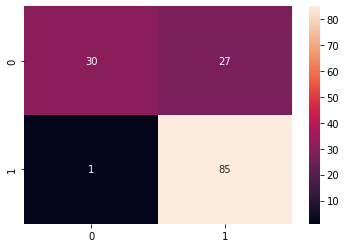

In [ ]:
mat_PA = confusion_matrix(y_test, PAy_pred_test)

sns.heatmap(mat_PA, annot=True)